## Coincidence

 Coincidence analysis on real detector data. Initial spectrogram processes are needed to produce the necessary arrays. This analysis is performed only on a section of the detector data file.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#read in n lines of data         X0   Y0   X1   Y1
#the data is the signal in Volts, but the callibration is not clear yet so take as arbitrary units
#skips the first 7 rows and places the next 4000000 in a numpy array
#change fname to data file path
data43 = np.loadtxt(fname = 'dataFiles/run-43', skiprows = 7, max_rows = 4000000)

#time step (seconds)
dt = 0.01

#Make complex signal 1
X0 = data43[:,0]
Y0 = data43[:,1]
iY0 = 1j*Y0

#Make complex signal 1
X1 = data43[:,2]
Y1 = data43[:,3]
iY1 = 1j*Y1
#combine x+iy to make complex signal
sig_0 = X0+iY0
sig_1 = X1+iY1

### Spectrogram

(76, 181812)

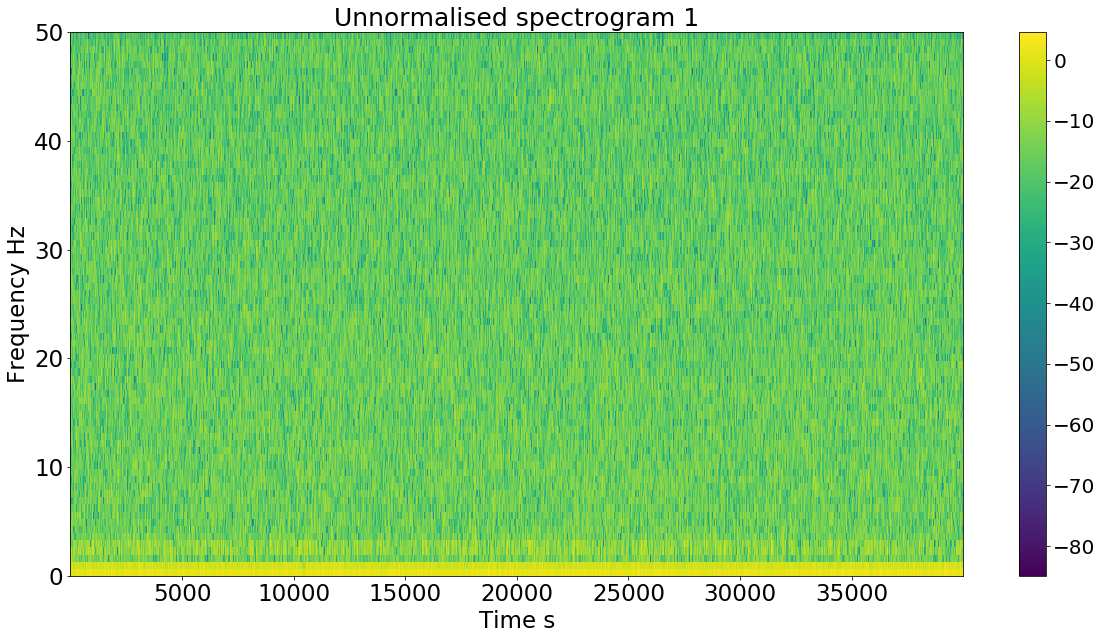

In [34]:
#SIGNAL 1
plt.figure(figsize=(20,10))
spectrum1, freqs1, t_bins1, im1 = plt.specgram(x=sig_1, Fs=1/dt, NFFT =150, sides='onesided')

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar(im1);
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
cbar.ax.tick_params(labelsize=20)
plt.title('Unnormalised spectrogram 1',fontsize=25)


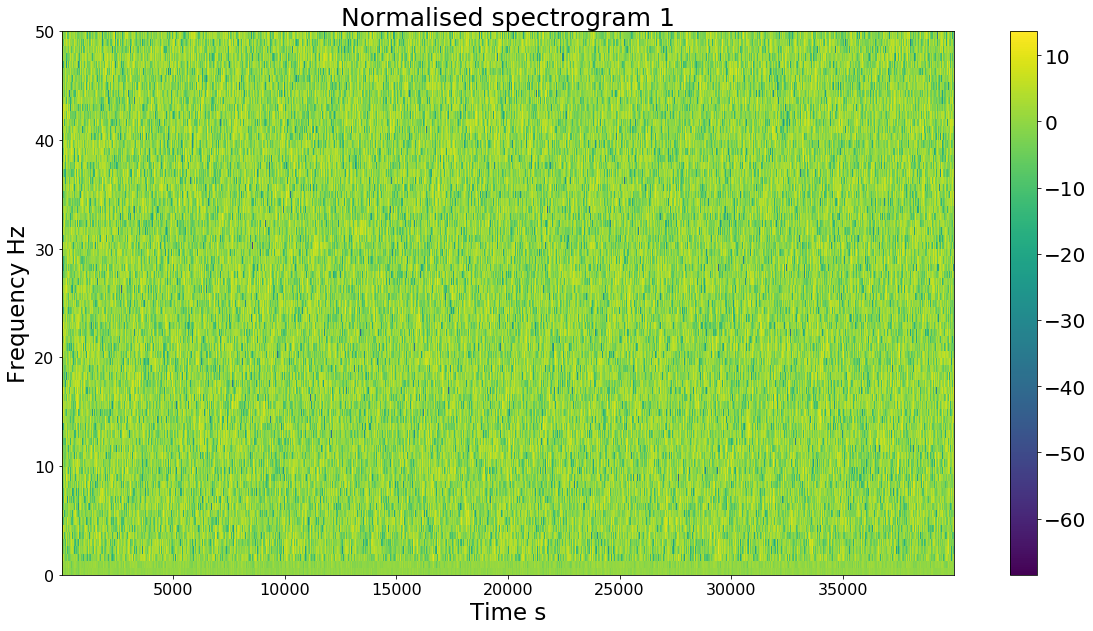

In [37]:
#SIGNAL 1

#normalise spectrum powers
#Median normalisation across individual frequencies
norm_spectrum1 = np.ones(np.shape(spectrum1))
for row in range(len(spectrum1)):
    median_row =  np.median(spectrum1[row])
    norm_spectrum1[row] = spectrum1[row]/median_row

    #plotting spectrogram with normalised powers
plt.figure(figsize=(20,10))
plt.pcolormesh(t_bins1, freqs1, 10 * np.log10(norm_spectrum1))

plt.ylabel("Frequency Hz",fontsize=23)
plt.xlabel("Time s",fontsize=23)
cbar = plt.colorbar();
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Normalised spectrogram 1',fontsize=25)


cbar.ax.tick_params(labelsize=20)


### Frequency Slicing

In [38]:
#Frequency slicing
#need to take frequencies in the resonant mode roughly 2-4Hz and one ouside this range eg. 30-40Hz

def freq_slice(min_freq, max_freq, freqs, t_bins, norm_spectrum,title):
    '''function slices the array containing the frequency spectrum using the min and max boundaries,
    and the corresponding spectrum powers. It plots the slices specgram and returns slice spectrum.'''
    
    #find the elements in the array in the HZ range
    slice_freqs = freqs[(min_freq<freqs) & (freqs<max_freq)]
    #and their indicies
    slice_indices = np.where((min_freq<freqs) & (freqs<max_freq))

    #need the spectrum powers corresponding to these freqs
    slice_spectrum = norm_spectrum[slice_indices]
    #res_mode_tbins = t_bins[res_mode_indices]
    
    #This doesn't really need plotted
    
    #now plot the spectrogram for this range
    plt.pcolormesh(t_bins, slice_freqs, 10 * np.log10(slice_spectrum))
    
    
    plt.ylabel("Frequency Hz",fontsize=23)
    plt.xlabel("Time s",fontsize=23)
    cbar = plt.colorbar();
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    cbar.ax.tick_params(labelsize=20)
    plt.title(title)
    
    return slice_spectrum, slice_freqs


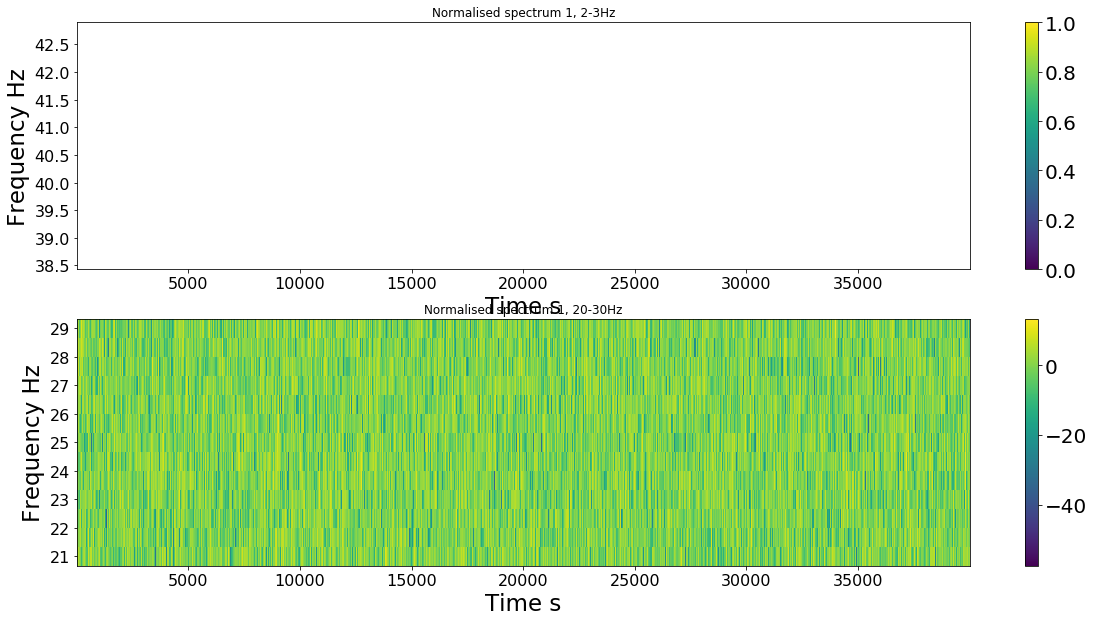

In [39]:
#SIGNAL 1

plt.figure(figsize=(20,10))
#Call function for resonant mode slice
plt.subplot(211)
res_slice1 = freq_slice(40,41, freqs=freqs1, t_bins=t_bins1, norm_spectrum=norm_spectrum1,title = 'Normalised spectrum 1, 2-3Hz')
res_slice_spec1 = res_slice1[0]
res_slice_freqs1 = res_slice1[1]



#Call function for background
plt.subplot(212)
bkgd_slice1 = freq_slice(20,30, freqs=freqs1, t_bins=t_bins1, norm_spectrum=norm_spectrum1,title='Normalised spectrum 1, 20-30Hz')
bkgd_slice_spec1 = bkgd_slice1[0]
bkgd_slice_freqs1 = bkgd_slice1[1]

### Thresholding


/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'peaks signal 1')

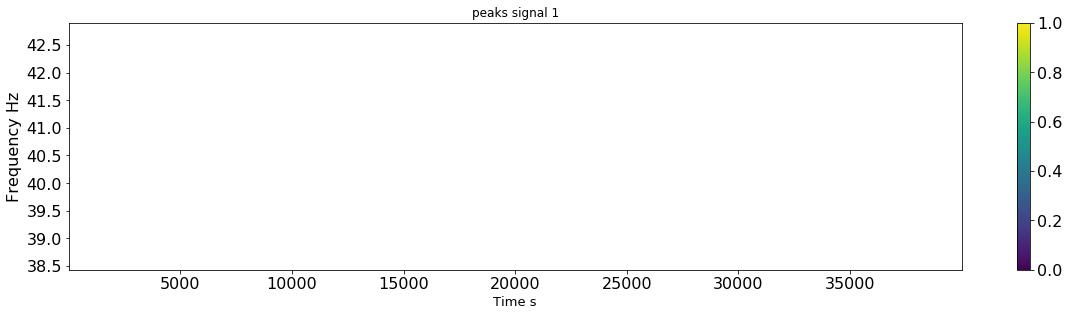

In [53]:
#look at undifferenced signal above threshold
threshold = 7


    
plt.figure(figsize=(20,10))


#SIGNAL 1
res_slice_spec_thresh1 = np.copy(res_slice_spec1)
res_slice_spec_thresh1[res_slice_spec_thresh1<threshold] = 0



#plot###
plt.subplot(212)
plt.pcolormesh(t_bins1, res_slice_freqs1 ,  10 * np.log10(res_slice_spec_thresh1))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
cbar = plt.colorbar();
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar.ax.tick_params(labelsize=16)
plt.title('peaks signal 1')
####


#### Signal 0 is quite noisy in the last 10k seconds so instead we can look at signal 1 as two separate signals by splitting it in two and pretending the two halfs are over the same time period but from different detectors

/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/niallgray/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Signal 1b (2nd half) thresholded between 2-3Hz')

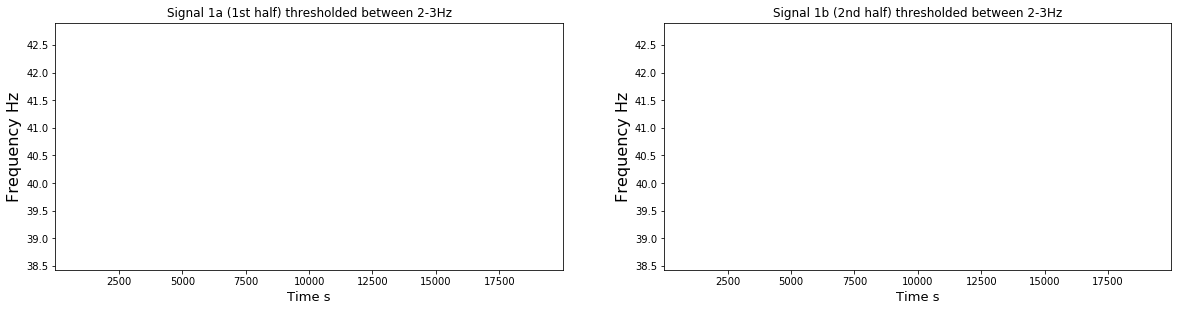

In [41]:
#need to split sig 1 into two sets - 2136 time bins so split 0-1067, 1068-2136
sig1a_thresh = np.copy(res_slice_spec_thresh1[:,:(len(t_bins1)//2)])
sig1b_thresh = np.copy(res_slice_spec_thresh1[:,(len(t_bins1)//2):])

#also split bins accordingly
t_bins1a = np.copy(t_bins1[:(len(t_bins1)//2)])

#change time stamps on second half of signal to imitate the first
t_bins1b = np.copy(t_bins1a)

#frequencies are the same as for the whole spectrum

plt.figure(figsize=(20,10))


plt.subplot(221)
plt.pcolormesh(t_bins1a,res_slice_freqs1,  10 * np.log10(sig1a_thresh))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
plt.title("Signal 1a (1st half) thresholded between 2-3Hz")

plt.subplot(222)
plt.pcolormesh(t_bins1b,res_slice_freqs1,  10 * np.log10(sig1b_thresh))
plt.ylabel("Frequency Hz",fontsize=16)
plt.xlabel("Time s",fontsize=13)
plt.title("Signal 1b (2nd half) thresholded between 2-3Hz")

### Detector coincidence

In [42]:
#Record time at which each event occurs

def peaktimes(spectrum, times):
    #find column indicies of pixels which are larger than 0
    peakLocation_column = np.where(spectrum > 0)[1]

    #remove duplicates(where more than one frequency is involved) and sort
    peakLocation_column = list(set(peakLocation_column))
    
    peakLocation_column = np.sort(peakLocation_column)

    #Now match these indicies with the correspondng times from t_bins
    peak_times = times[peakLocation_column]
    
    return peak_times


#### coincidence between signal 1a and 1b

In [44]:
abs_tolerance = 4.9
#peak times of the divided spectrum of signal 1 to mimic two detectors
peaktimes1a = peaktimes(sig1a_thresh,t_bins1a)
peaktimes1b = peaktimes(sig1b_thresh,t_bins1b)

#non-time shifted coincidence
atol_coinc_1ab = {i for i in peaktimes1a if np.isclose(peaktimes1b, i, atol=abs_tolerance).any()}
atol_coinc_1ab = np.sort(list(atol_coinc_1ab))
#total coincidences
no_coinc_1ab = len(atol_coinc_1ab)
print("total coincidences, non-time shifted, signal 1a and signal 1b: ", no_coinc_1ab)

total coincidences, non-time shifted, signal 1a and signal 1b:  175


### Background coincidence - using time shift


In [46]:
#Time shifts -hold one signal and add dt seconds to the other a number of times
#average bkgd coincidence is average coincidence across all the shifts

def timeshift_coincidence(sigA, sigB, time_step, abs_tolerance):
    #want to count total coincidences
    coinc_count = []

    for t in range(-100,101):
        t_shift = time_step * t
        sigA_tshift = np.copy(sigA) + t_shift

        #coincidence
        atol_coinc_tshift = {i for i in sigA_tshift if np.isclose(sigB, i, atol=abs_tolerance).any()}
        #no. coincidences
        
        
        coinc_count.append(len(atol_coinc_tshift))
    return coinc_count
    


#### Background of signal 1a and 1b time shifted

Text(0.5, 0, 'timeshift(s)')

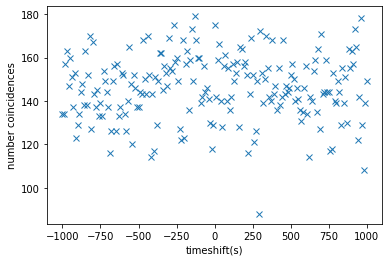

In [47]:
time_step = 10
bgd_coinc_1ab = timeshift_coincidence(peaktimes1a,peaktimes1b,time_step=time_step,abs_tolerance=abs_tolerance)

timeshifts = np.array(range(-100,101))*time_step
plt.plot((timeshifts),bgd_coinc_1ab,'x')
plt.ylabel('number coincidences')
plt.xlabel('timeshift(s)')

In [48]:
#average bkgd coincidence is average coincidence across all the shifts
#dont want to count the unshifted count in the average background counts
bgd_coinc_1ab[100] = 0
#average number of background coincidences
ave_bgd_coinc = np.sum(bgd_coinc_1ab)/len(bgd_coinc_1ab)-1

In [49]:
print("Number of coincident peak times: ",no_coinc_1ab)
print("Number of background coincidences: ", ave_bgd_coinc)

Number of coincident peak times:  175
Number of background coincidences:  144.26865671641792


In [50]:
theorecticalAveCoinc = len(peaktimes1a)*len(peaktimes1b)*(abs_tolerance)*2/40000

In [51]:
theorecticalAveCoinc

132.20886000000002

In [52]:
ave_bgd_coinc/theorecticalAveCoinc

1.0912177649547685